In [11]:
import pandas as pd
import numpy as np
import scipy
import random
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
def color_generator():
    color = '#'
    for i in range(6):
        index = 0
        for j in xrange(1000) :
            index = random.randint(0, 15)
        color += (symbols[index])
    return color

0 - Uniform
1 - Cauchy
2 - Poisson
3 - Lambda

In [13]:
alpha = 0.95

In [14]:
1 - alpha / 2.

0.525

In [15]:
(1 - alpha) / 2

0.025000000000000022

Для распределения Кощши будет $(\mu - \frac{\pi}{2} * u_{1 - \frac{\alpha}{2}} / \sqrt(n), \mu + \frac{\pi}{2} * u_{1 + \frac{\alpha}{2}} / \sqrt(n))$ $u_{\alpha}$ - Квантиль стандартного

In [71]:
def cauchy_interval(selection, quantile, alpha, second_alpha=-1, second_quantile=-1):
    return [np.median(selection[:i + 1]) - (np.pi / 2.) * (quantile) / (np.sqrt(len(selection[:i + 1]))) for i in range(len(selection))],\
           [np.median(selection[:i + 1]) + (np.pi / 2.) * (quantile) / (np.sqrt(len(selection[:i + 1]))) for i in range(len(selection))]

Для взятой статистики минимум в равномерном распределении , доверительным интервалом будет $( X_{(1)}, \frac{X_{(1)}}{1-\sqrt[n]{\alpha}})$

In [72]:
def uniform_min_interval(selection, quantile, alpha,second_alpha=-1, second_quantile=-1):
    return [np.min(selection[:i + 1.]) for i in range(len(selection))]\
          ,[np.min(selection[:i + 1.]) / float(1. - ((alpha)) ** (1. / len(selection[:i + 1]))) for i in range(len(selection))]

Для Равномерного распределения и взятой статистики $\overline{X}$, доверительным интервалом будет  ($\frac{\overline{X}}{\frac{1}{2} + \sqrt{(\frac{1}{12 * (\alpha) * n})}},\frac{\overline{X}}{\frac{1}{2} - \sqrt{(\frac{1}{12 * (\alpha) * n})}}$)

In [73]:
def uniform_mean_interval(selection, quantile, alpha,second_alpha=-1, second_quantile=-1):
    return [np.mean(selection[:i + 1.]) / (1. / 2. + np.sqrt(1./(12. * (alpha) * (i + 1.)))) for i in range(len(selection))]\
          ,[np.mean(selection[:i + 1.]) / (1. / 2. - np.sqrt(1./(12. * (alpha) * (i + 1.)))) for i in range(len(selection))]

Точный доверительный интервал уровня $\alpha$ для $U(0, \theta)$ - это $(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})$. 

In [74]:
def uniform_max_interval(selection, quantile, alpha,second_alpha=-1, second_quantile=-1):
    return [np.max(selection[:i + 1.])for i in range(len(selection))]\
          ,[np.max(selection[:i + 1.]) / float(((1. - alpha)) ** (1. / len(selection[:i + 1]))) for i in range(len(selection))]

Для пуассоновского распределения будет так $( \overline{X} - u_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{n}},\overline{X} + u_{\frac{1+\alpha}{2}} \frac{\overline{X}}{\sqrt{n}})$, where $u_{\alpha}$ - $\alpha$-квантиль стандартного нормального распределения

In [75]:
def poission_interval(selection, quantile, alpha,second_alpha=-1, second_quantile=-1):
    return [np.mean(selection[:i + 1]) - quantile * (np.mean(selection[:i + 1]) / np.sqrt(i + 1.)) for i in range(len(selection))] \
          ,[np.mean(selection[:i + 1]) + quantile * (np.mean(selection[:i + 1]) / np.sqrt(i + 1.)) for i in range(len(selection))]
    

In [21]:
lamba = 10

Когда лямбда известен, получим такой интервал $(\overline{X} - u_{\frac{1 - \alpha}{2}} * \overline{X} / \sqrt{\lambda n},\overline{X} +u_{\frac{1 + \alpha}{2}} * \overline{X} / \sqrt{\lambda n})$ u_{$\alpha$} - квантиль стандартного нормального

In [77]:
def gamma_known_lambda(selection, quantile, alpha,second_alpha=-1, second_quantile=-1):
    return [np.mean(selection[:i + 1]) - quantile * (np.mean(selection[:i + 1]) / (np.sqrt(i + 1.)) * np.sqrt(lamba)) for i in range(len(selection))] \
          ,[np.mean(selection[:i + 1]) + second_quantile * (np.mean(selection[:i + 1]) / (np.sqrt(i + 1.)) *  np.sqrt(lamba)) for i in range(len(selection))]

In [23]:
def gamma_unknown_lambda(selection,quantile,alpha,second_alpha=-1, second_quantile=-1):
    
    

IndentationError: expected an indented block (<ipython-input-23-5d572216aa8c>, line 3)

In [78]:
def draw_interval(distribution, alpha, confidence_interval, ylimit=(0,0), second_alpha=-1, need_normal = False):
    plt.figure(figsize=(10,10))
    selection = distribution.rvs(size=100)
    second_quantile = -1
    quantile = distribution.ppf(alpha)
    if second_alpha != -1:
        second_quantile = distribution.ppf(second_alpha)
    if need_normal:
        quantile = scipy.stats.norm.ppf(alpha)
        second_quantile = scipy.stats.norm.ppf(second_alpha)
    left_bound, right_bound = confidence_interval(selection, quantile, alpha, second_alpha, second_quantile)
    dots = range(1,101)
    plt.fill_between(dots, left_bound, right_bound, antialiased=True, \
                     edgecolor = color_generator(), facecolor = color_generator(), hatch = '*', linewidth=3.)
    if ylimit != (0,0):
        plt.ylim(ylimit)

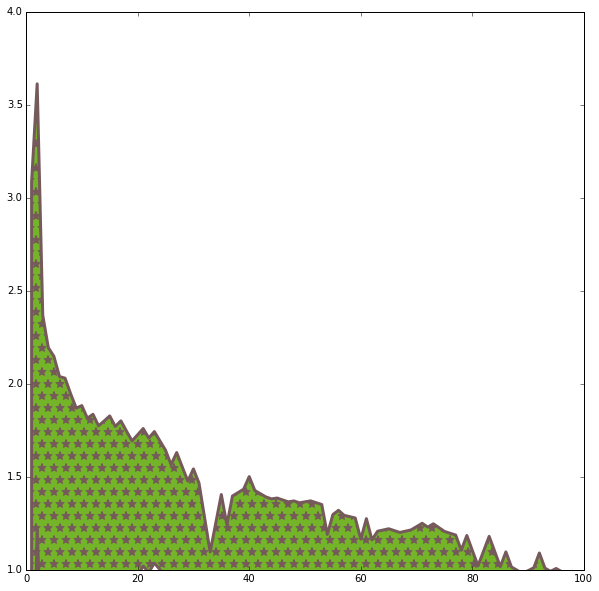

In [84]:
draw_interval(scipy.stats.cauchy(1,1), 1 - (alpha) / 2., cauchy_interval, True)

/Users/semenfedotov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


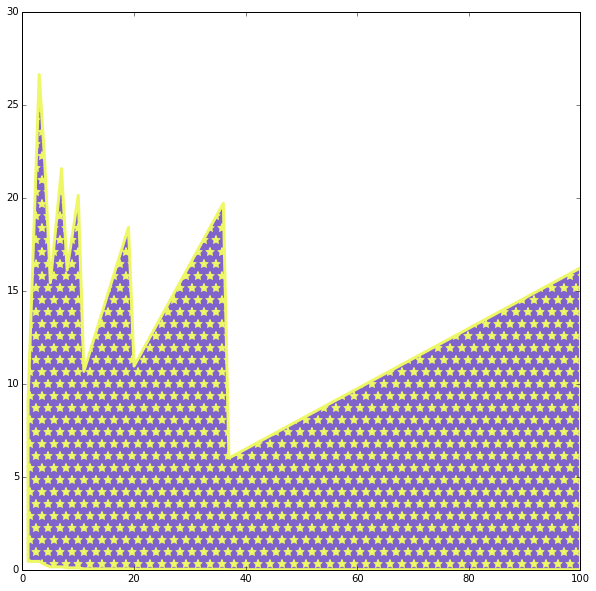

In [80]:
draw_interval(scipy.stats.uniform(0,1), alpha, uniform_min_interval)

/Users/semenfedotov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


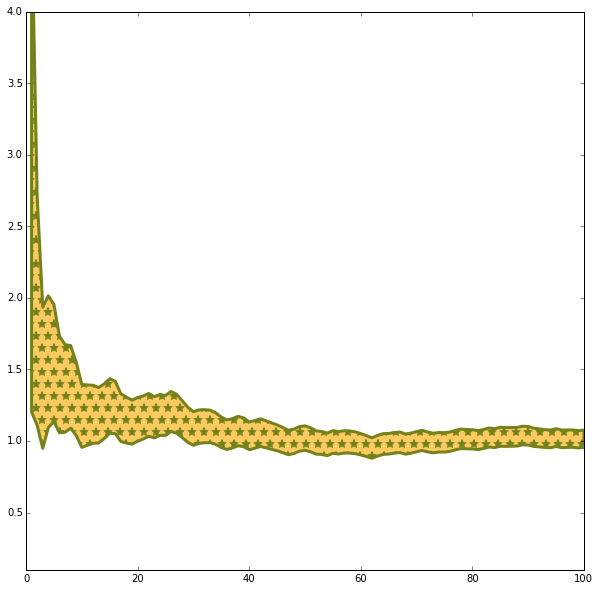

In [81]:
draw_interval(scipy.stats.uniform(0,1), alpha, uniform_mean_interval, ylimit=(0.1,4))

/Users/semenfedotov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


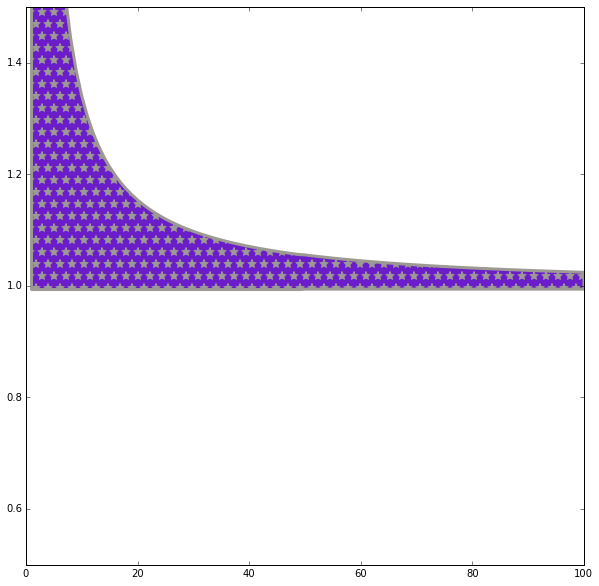

In [82]:
draw_interval(scipy.stats.uniform(0,1), alpha, uniform_max_interval, ylimit=(0.5,1.5))

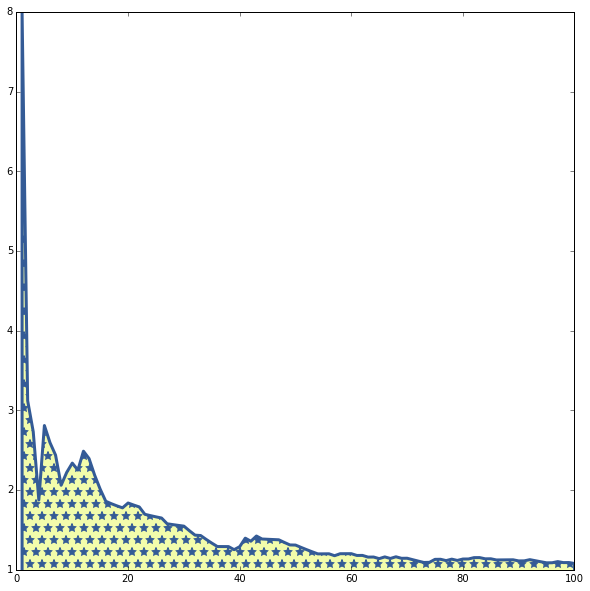

In [83]:
draw_interval(scipy.stats.poisson(1), (1 + alpha) / 2., poission_interval, True)

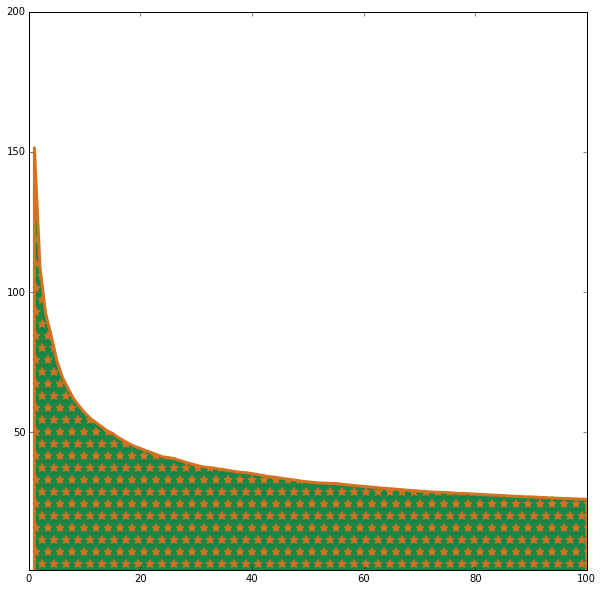

In [86]:
draw_interval(scipy.stats.gamma(1,10), (1. + alpha) / 2.,  poission_interval, True, second_alpha=(1 - alpha) / 2.)

(0, 0.5)

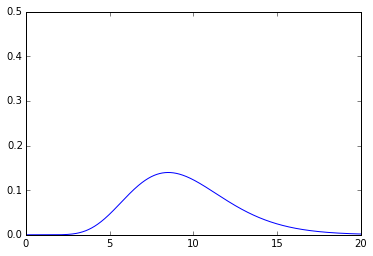

In [57]:
dotki = np.linspace(0,20,1000)
plt.plot(dotki, [scipy.stats.gamma.pdf(dotka, 9, 0.5) for dotka in dotki])
plt.ylim(0,0.5)

In [ ]:
np.random.gamma()